In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Data understanding 

In [2]:
data = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv', sep=',')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data cleaning 

In [7]:
df = data.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1)

In [8]:
df.groupby(["Survived","Pclass","SibSp"])["Age"].mean()

Survived  Pclass  SibSp
0         1       0        46.375000
                  1        38.500000
                  2        44.000000
                  3        19.000000
          2       0        33.833333
                  1        34.239130
                  2        25.000000
          3       0        29.103175
                  1        27.966667
                  2        24.444444
                  3         5.428571
                  4         6.800000
                  5        10.200000
                  8              NaN
1         1       0        34.594203
                  1        36.998298
                  2        35.500000
                  3        23.500000
          2       0        29.333261
                  1        22.421875
                  2        13.250000
                  3        30.000000
          3       0        22.990333
                  1        17.277778
                  2         2.166667
                  3        33.000000
              

In [9]:
df.drop(df[df['SibSp'] == 8].index, inplace=True)

In [10]:
df['Age'] = df['Age'].fillna(data.groupby(["Survived","Pclass","SibSp"])["Age"].transform('mean'))

In [11]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

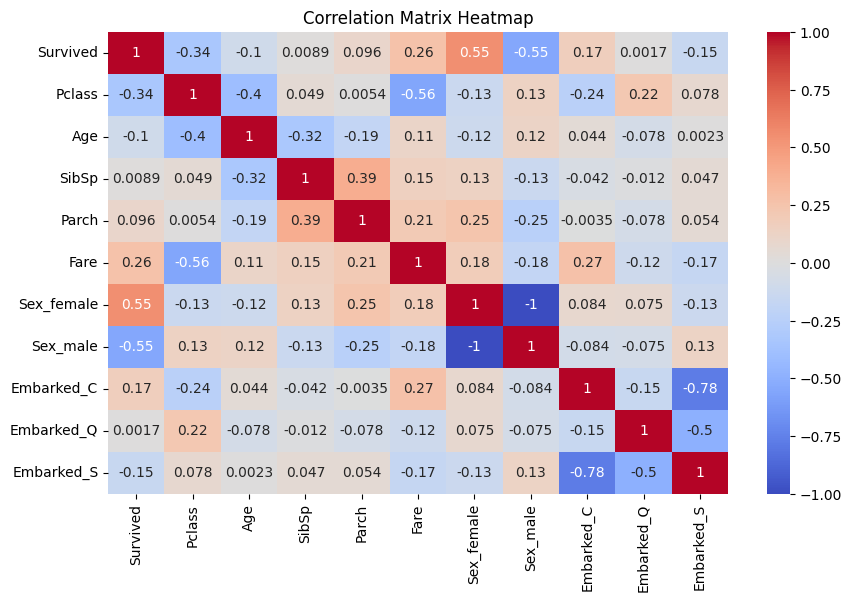

In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [13]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,False,True,False,False,True
1,1,1,38.000000,1,0,71.2833,True,False,True,False,False
2,1,3,26.000000,0,0,7.9250,True,False,False,False,True
3,1,1,35.000000,1,0,53.1000,True,False,False,False,True
4,0,3,35.000000,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,False,True,False,False,True
887,1,1,19.000000,0,0,30.0000,True,False,False,False,True
888,0,3,27.966667,1,2,23.4500,True,False,False,False,True
889,1,1,26.000000,0,0,30.0000,False,True,True,False,False


# Model learning

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import joblib

In [15]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [16]:
scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)
scaler.fit(X[['Fare','Age']])
X[['Fare','Age']]=scaler.transform(X[['Fare','Age']])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## GridSearshCV

In [18]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

param_grid_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [19]:
rf = RandomForestClassifier()
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
lr = LogisticRegression(max_iter=1000)
gbc = GradientBoostingClassifier()

In [20]:
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_xgb = GridSearchCV(xgb_clf, param_grid_xgb, cv=5, scoring='accuracy')
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_gbc = GridSearchCV(gbc, param_grid=param_grid_gbc, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [21]:
grids = {
    'Random Forest': grid_rf,
    'XGBoost': grid_xgb,
    'Logistic Regression': grid_lr,
    'Gradient Boosting Classifier': grid_gbc
}

Training Random Forest...
Random Forest Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy: 0.8192090395480226
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       104
           1       0.81      0.74      0.77        73

    accuracy                           0.82       177
   macro avg       0.82      0.81      0.81       177
weighted avg       0.82      0.82      0.82       177



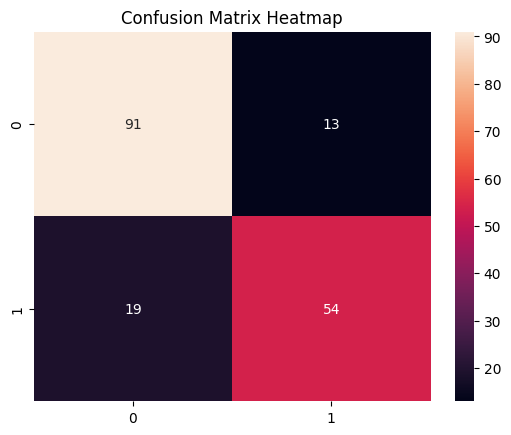

Best Random Forest model saved as best_random_forest_model.pkl





Training XGBoost...
XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
XGBoost Accuracy: 0.8361581920903954
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       104
           1       0.82      0.77      0.79        73

    accuracy                           0.84       177
   macro avg       0.83      0.83      0.83       177
weighted avg       0.84      0.84      0.84       177



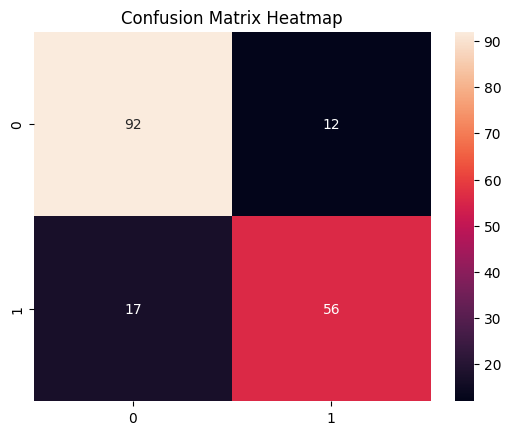

Best XGBoost model saved as best_xgboost_model.pkl





Training Logistic Regression...
Logistic Regression Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.8248587570621468
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       104
           1       0.78      0.79      0.79        73

    accuracy                           0.82       177
   macro avg       0.82      0.82      0.82       177
weighted avg       0.83      0.82      0.83       177



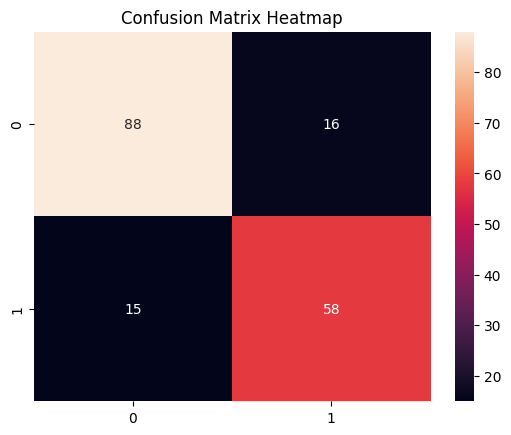

Best Logistic Regression model saved as best_logistic_regression_model.pkl





Training Gradient Boosting Classifier...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Gradient Boosting Classifier Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 1.0}
Gradient Boosting Classifier Accuracy: 0.8587570621468926
Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       104
           1       0.84      0.81      0.83        73

    accuracy                           0.86       177
   macro avg       0.86      0.85      0.85       177
weighted avg       0.86      0.86      0.86       177



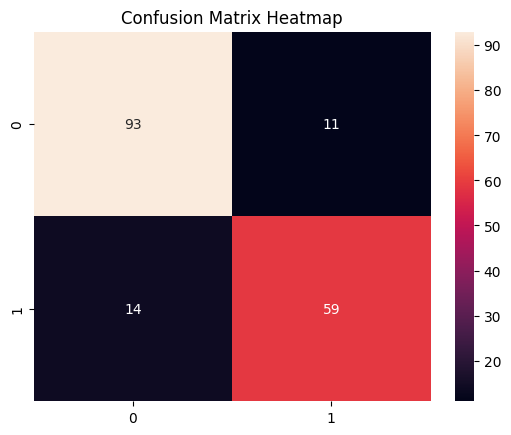

Best Gradient Boosting Classifier model saved as best_gradient_boosting_classifier_model.pkl







In [22]:
for name, grid in grids.items():
    print(f"Training {name}...")
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f"{name} Best Parameters: {grid.best_params_}")
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plt.title('Confusion Matrix Heatmap')
    plt.show()
    # Save the best model
    model_filename = f'best_{name.lower().replace(" ", "_")}_model.pkl'
    joblib.dump(best_model, model_filename)
    print(f"Best {name} model saved as {model_filename}\n\n")
    print('\n\n')